In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Data Loading 
df = pd.read_csv("C:/Users/terre/OneDrive/Documents/Theresa_Projects/CSV/dataset.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

# Data cleaning and Preprocessing

In [6]:
#dropping unnecessary columns
df.drop(['Unnamed: 0', 'track_id', 'key', 'loudness', 'mode', 'tempo', 'time_signature'], axis=1, inplace=True)

In [7]:
df.dtypes

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
track_genre          object
dtype: object

In [8]:
# Checking the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 114000
Number of columns: 14


In [9]:
print(df.isnull().sum())

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
track_genre         0
dtype: int64


In [10]:
# Handle missing values
df.dropna(inplace=True)  # Remove rows with missing values

In [11]:
print(df.isnull().sum())

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
track_genre         0
dtype: int64


In [12]:
print(df.duplicated().sum())

578


In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [14]:
print(df.duplicated().sum())

0


In [15]:
# Descriptive statistics of the numerical columns
print(df.describe())

          popularity   duration_ms   danceability         energy  \
count  113421.000000  1.134210e+05  113421.000000  113421.000000   
mean       33.359969  2.281024e+05       0.567114       0.642172   
std        22.269504  1.064503e+05       0.173403       0.251031   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.741700e+05       0.456000       0.473000   
50%        35.000000  2.130160e+05       0.580000       0.685000   
75%        50.000000  2.616000e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  113421.000000  113421.000000     113421.000000  113421.000000   
mean        0.084698       0.314077          0.155797       0.213611   
std         0.105803       0.331943          0.309311       0.190482   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       

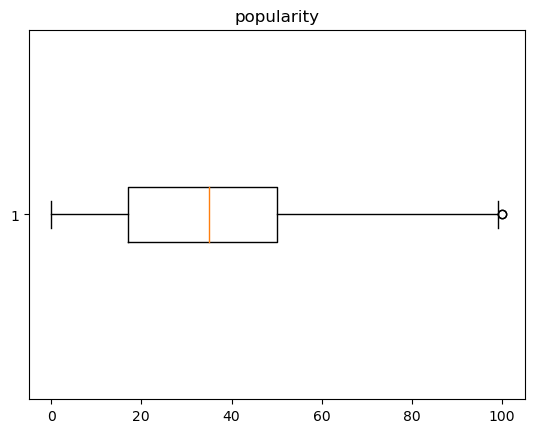

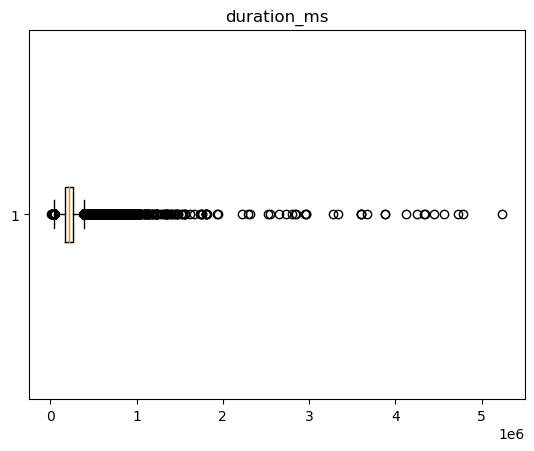

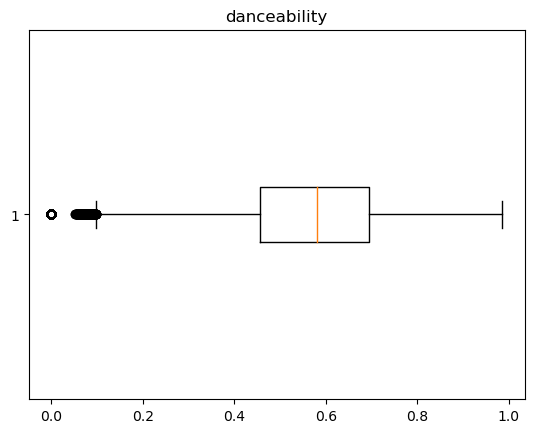

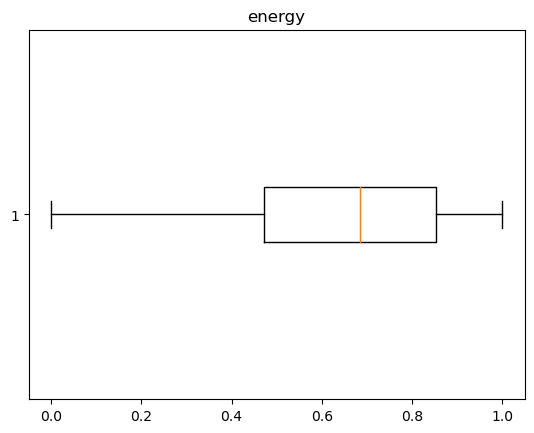

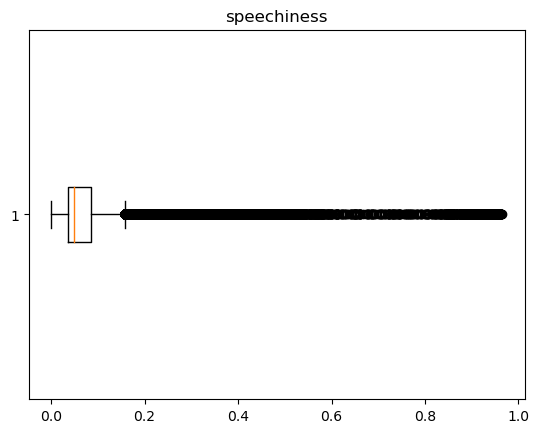

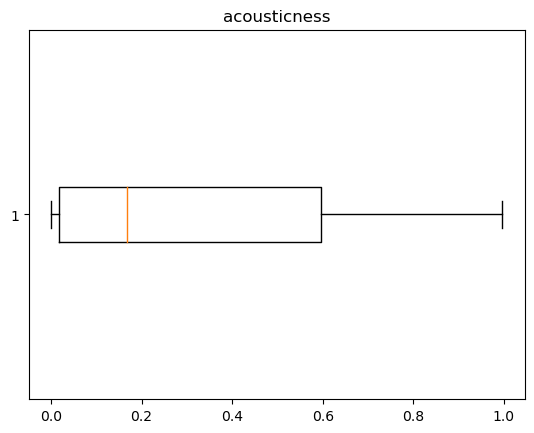

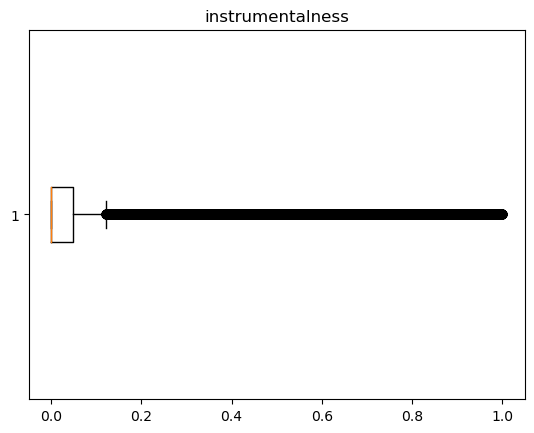

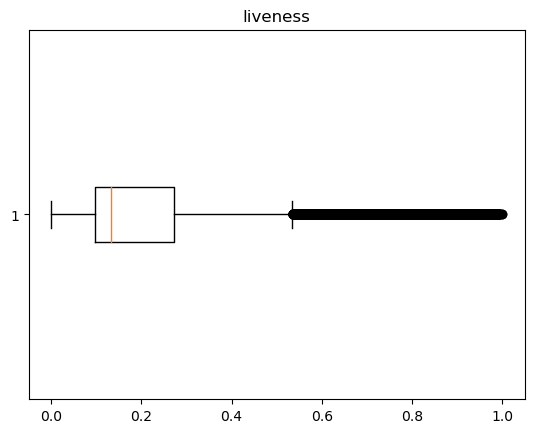

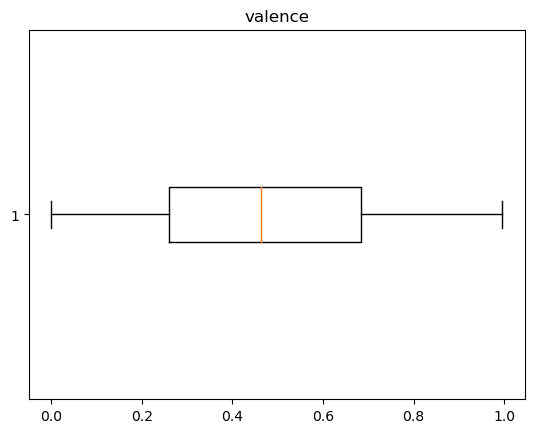

In [22]:
# Check for outliers
columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence']
for column in columns:
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.show()

In [23]:
#handling the outliers

z_scores = pd.DataFrame()
for columns in columns:
    z_scores[columns] = (df[columns] - df[columns].mean()) / df[columns].std()

In [24]:
# Set the threshold for detecting outliers
z_score_threshold = 3

In [25]:
# Identify outliers using the z-score
outlier_indices = z_scores.abs() > z_score_threshold

In [26]:
# Replace outliers with NaN values
df[outlier_indices] = np.nan

In [27]:
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.7150,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,0.0763,0.9240,0.000006,0.1010,0.2670,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0.0557,0.2100,0.000000,0.1170,0.1200,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.1430,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.1670,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999.0,False,0.172,0.2350,0.0422,0.6400,0.928000,0.0863,0.0339,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000.0,False,0.174,0.1170,0.0401,0.9940,0.976000,0.1050,0.0350,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466.0,False,0.629,0.3290,0.0420,0.8670,0.000000,0.0839,0.7430,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893.0,False,0.587,0.5060,0.0297,0.3810,0.000000,0.2700,0.4130,world-music


In [28]:
# Impute missing values with appropriate strategy
df.fillna(df.median(), inplace=True)

C:\Users\terre\AppData\Local\Temp\ipykernel_10672\2772270459.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


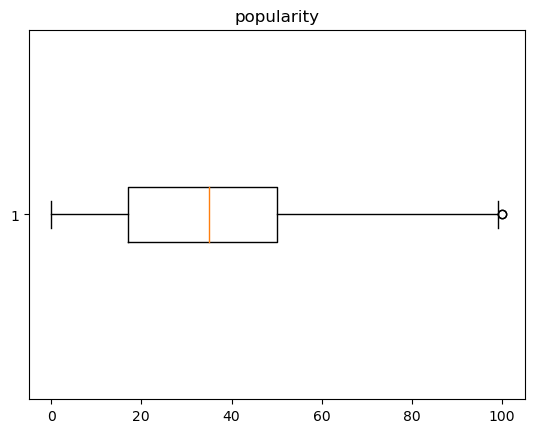

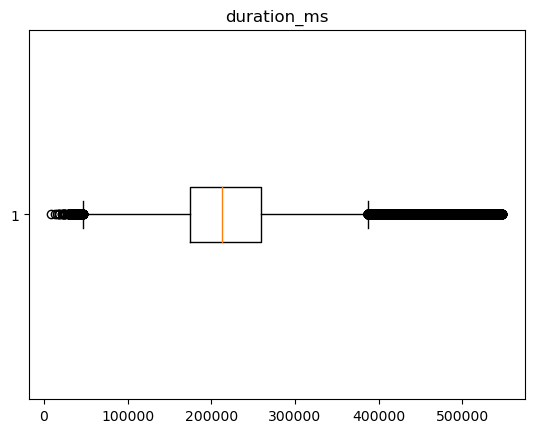

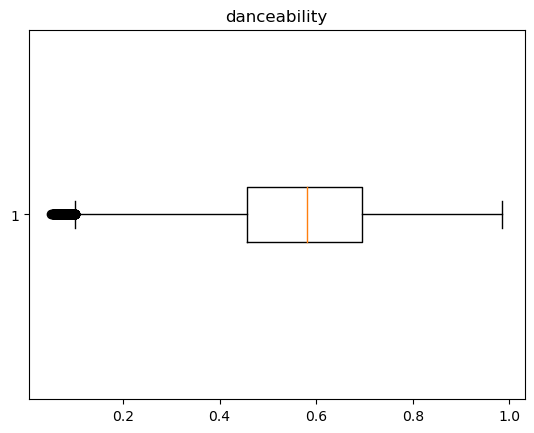

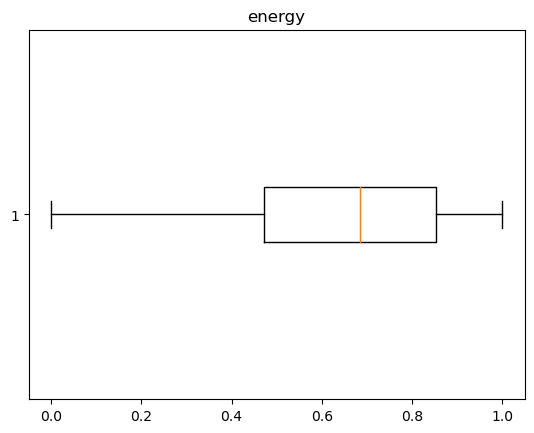

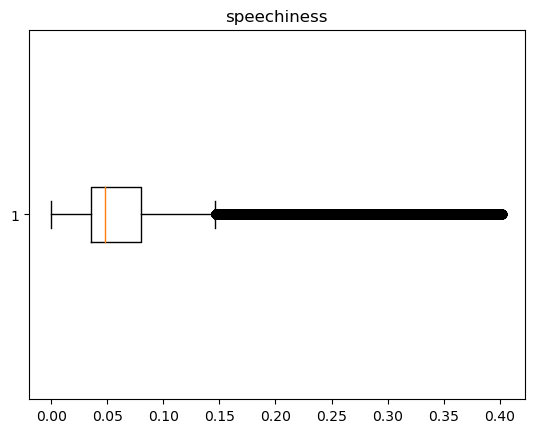

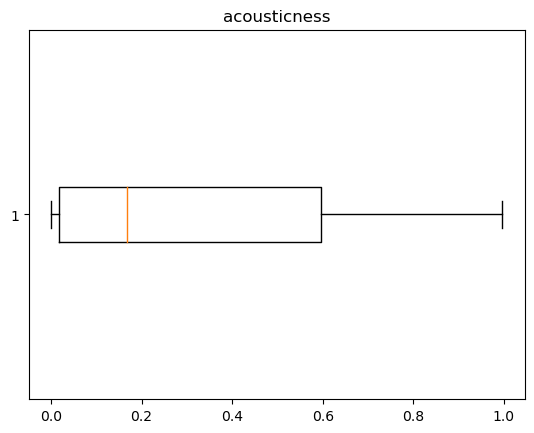

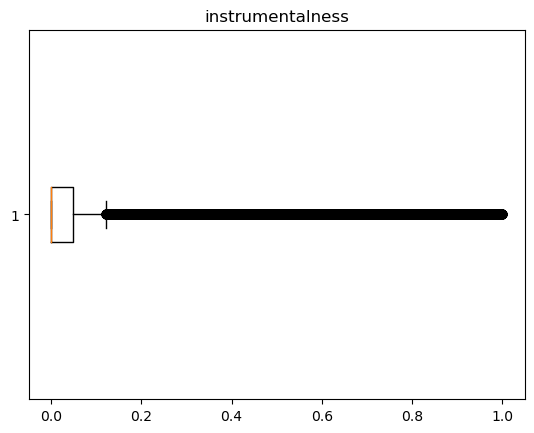

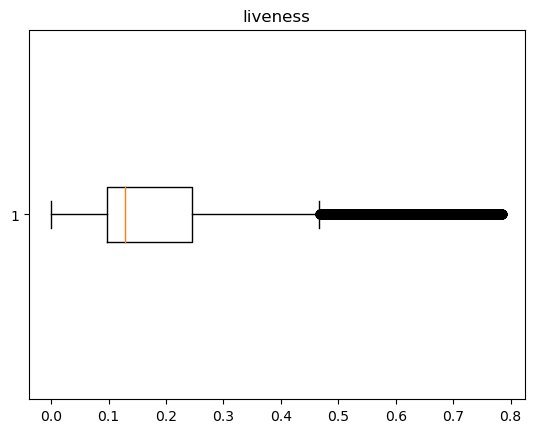

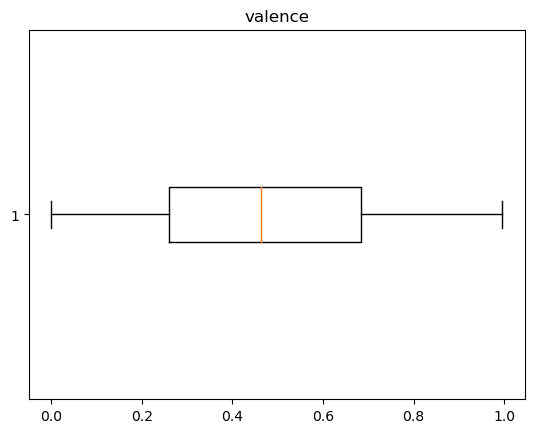

In [29]:
# Visualize the distribution of numerical variables after outlier handling
columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence']
for column in columns:
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.show()

# EDA

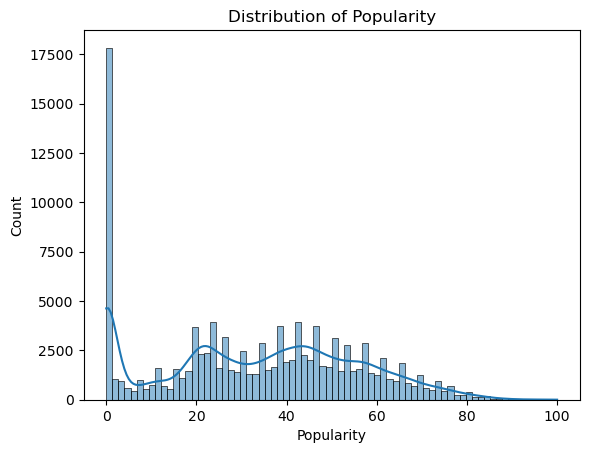

In [30]:
# Analyze the distribution of variables
sns.histplot(df['popularity'], kde=True)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

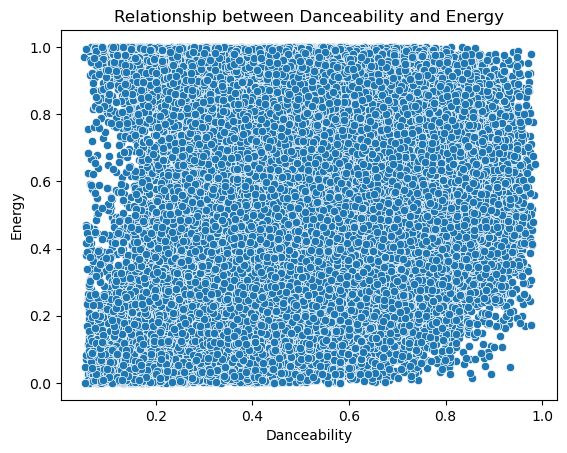

In [31]:
# Create scatter plot for variables' relationships
sns.scatterplot(x='danceability', y='energy', data=df)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Relationship between Danceability and Energy')
plt.show()

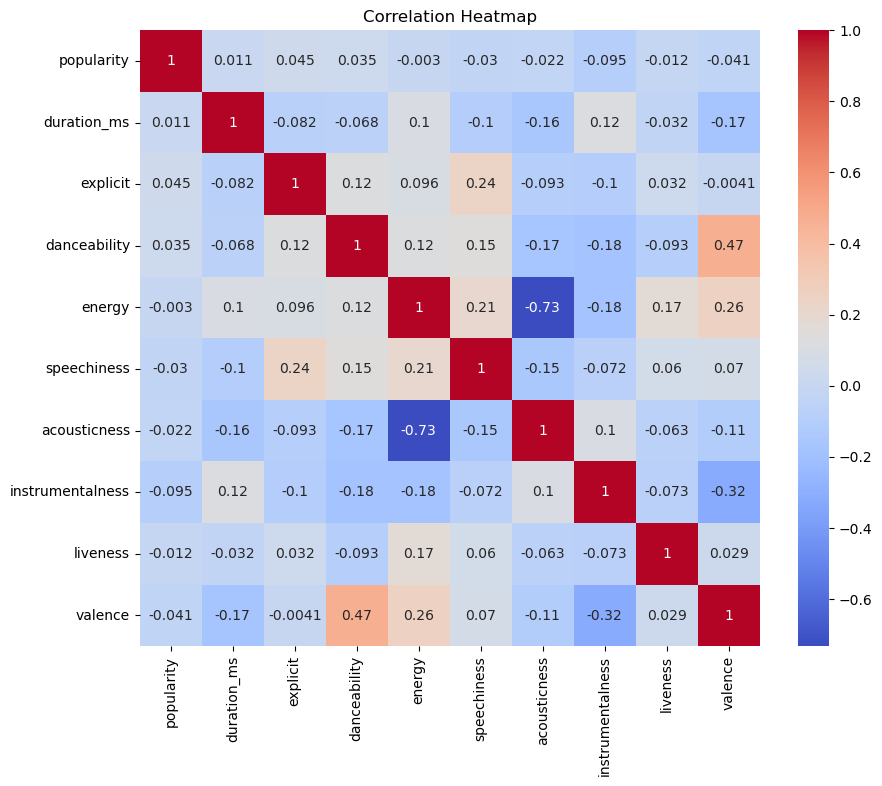

In [32]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

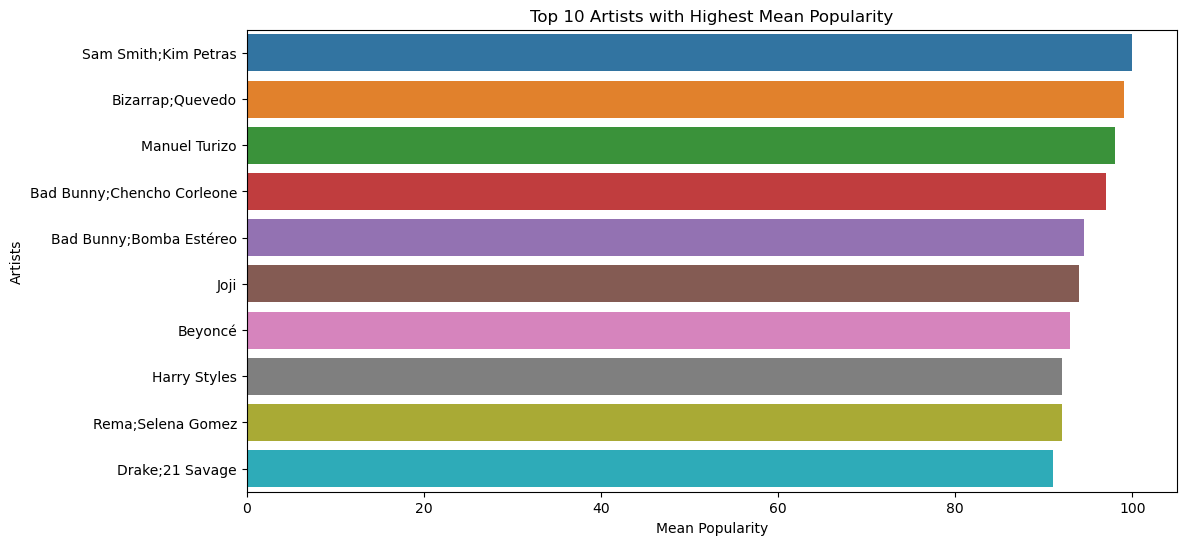

In [33]:
# Bar Plot of Artists with Top 10 Popularity
top10_artists = df.groupby('artists')['popularity'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_artists.values, y=top10_artists.index, orient='h')
plt.xlabel('Mean Popularity')
plt.ylabel('Artists')
plt.title('Top 10 Artists with Highest Mean Popularity')
plt.show()

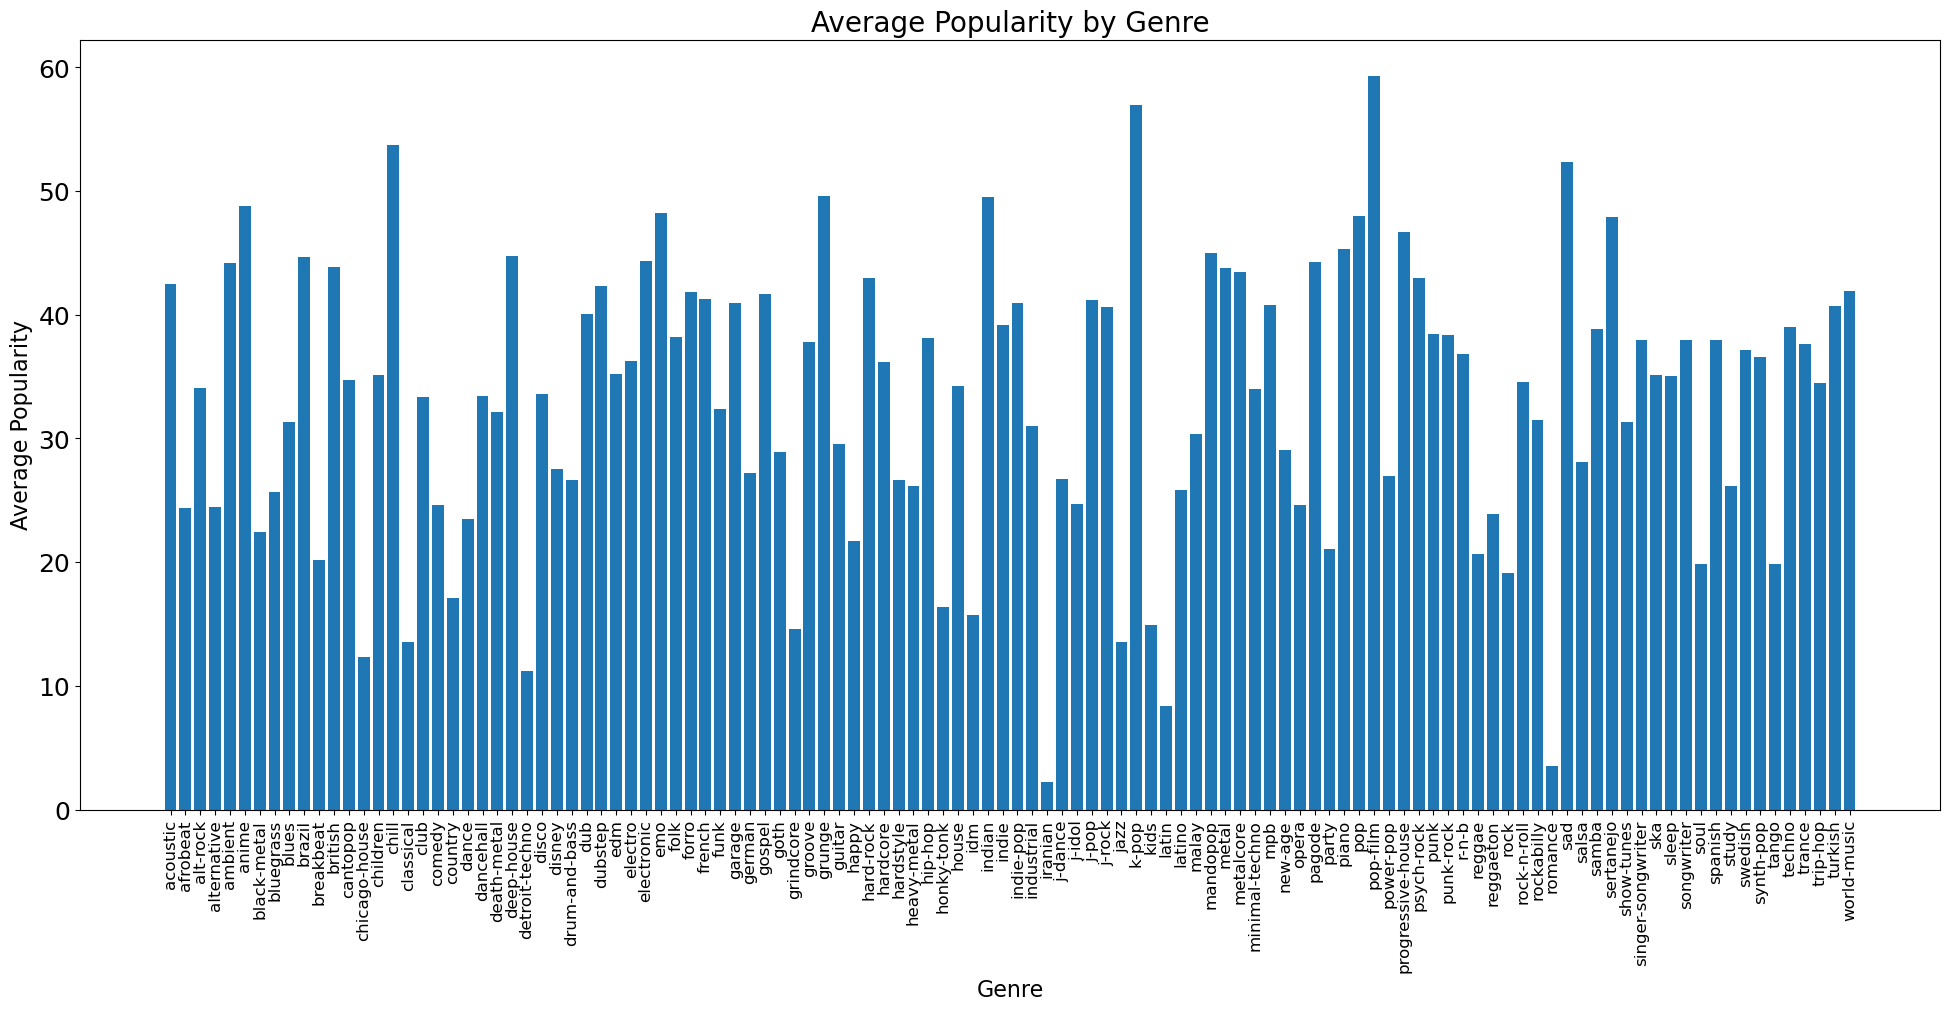

In [34]:
import matplotlib.pyplot as plt

# Calculate average popularity by genre
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean()

# Create a bar chart
plt.figure(figsize=(24, 10))
plt.bar(avg_popularity_by_genre.index, avg_popularity_by_genre.values)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Average Popularity', fontsize=16)
plt.title('Average Popularity by Genre', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=18)
plt.show()


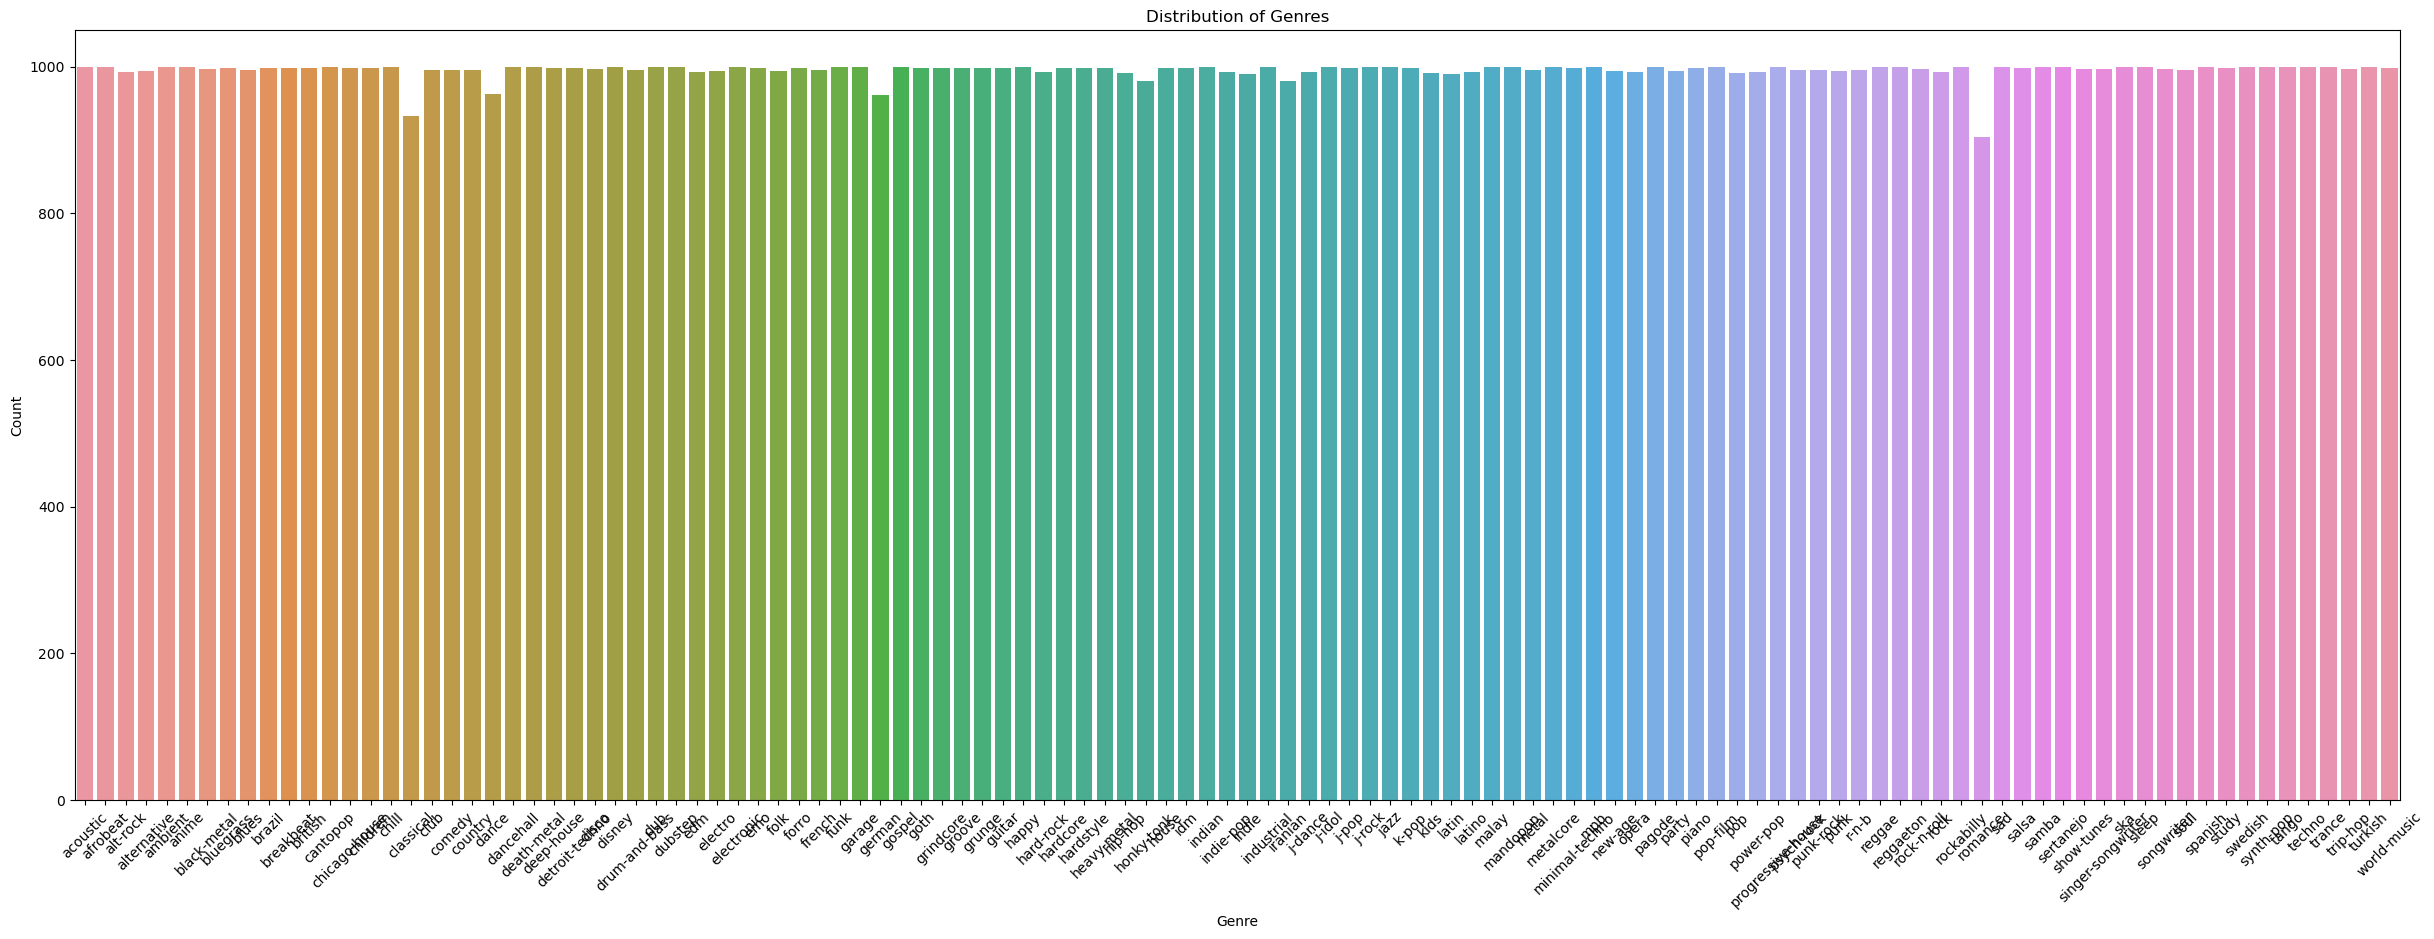

In [35]:
# Bar Plot of Track Genre
plt.figure(figsize=(30, 10))
sns.countplot(x='track_genre', data=df)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Save the updated dataset to a new CSV file
df.to_csv('sportify_cleaned.csv', index=False)

In [38]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'track_genre'],
      dtype='object')

# Features Engineering

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [43]:
# Drop irrelevant columns
df = df[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_genre']]


In [46]:
# Encode categorical variables
df = pd.get_dummies(df)

In [48]:
# Split the data into features (X) and target variable (y)
X = df.drop('popularity', axis=1)
y = df['popularity']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection & training

In [52]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

In [53]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
dt_reg_predictions = dt_reg.predict(X_test_scaled)

In [54]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)
rf_reg_predictions = rf_reg.predict(X_test_scaled)

In [55]:
# XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
xgb_reg_predictions = xgb_reg.predict(X_test_scaled)


# Model evaluation

In [56]:
def evaluate_model(model, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

print("Linear Regression:")
evaluate_model(linear_reg, linear_reg_predictions)

print("Decision Tree Regressor:")
evaluate_model(dt_reg, dt_reg_predictions)

print("Random Forest Regressor:")
evaluate_model(rf_reg, rf_reg_predictions)

print("XGBoost Regressor:")
evaluate_model(xgb_reg, xgb_reg_predictions)


Linear Regression:
Mean Squared Error: 375.1558589569339
R-squared: 0.2510446537438733
Decision Tree Regressor:
Mean Squared Error: 471.44780658282434
R-squared: 0.05880890091212976
Random Forest Regressor:
Mean Squared Error: 250.9587363654486
R-squared: 0.4989898656703077
XGBoost Regressor:
Mean Squared Error: 335.1001330226193
R-squared: 0.3310112845998744


# Interpretation of Model Evaluation:

# Linear Regression:

Mean Squared Error (MSE): The average squared difference between the predicted popularity values and the actual popularity values is 375.16. Lower values indicate better model performance.
R-squared (R^2): The coefficient of determination is 0.25, which means that approximately 25% of the variability in the popularity can be explained by the linear regression model. A higher R-squared value indicates a better fit.

# Decision Tree Regressor:

MSE: The average squared difference between the predicted popularity values and the actual popularity values is 471.45. The decision tree model has a higher MSE compared to linear regression, indicating higher prediction errors.
R-squared: The R-squared value is 0.06, which indicates that only 6% of the variability in the popularity can be explained by the decision tree model. It is relatively low compared to the linear regression model.

# Random Forest Regressor:

MSE: The average squared difference between the predicted popularity values and the actual popularity values is 250.96. The random forest model has the lowest MSE among the evaluated models, indicating better prediction accuracy.
R-squared: The R-squared value is 0.50, which indicates that approximately 50% of the variability in the popularity can be explained by the random forest model. It is higher than the linear regression and decision tree models, suggesting a better fit.

# XGBoost Regressor:

MSE: The average squared difference between the predicted popularity values and the actual popularity values is 335.10. The XGBoost model has a lower MSE compared to the decision tree model but higher than the random forest model.
R-squared: The R-squared value is 0.33, indicating that approximately 33% of the variability in the popularity can be explained by the XGBoost model. It is higher than the linear regression and decision tree models but lower than the random forest model.
In summary, among the evaluated models, the Random Forest Regressor performs the best in terms of prediction accuracy, as it has the lowest MSE and the highest R-squared value. The linear regression model has moderate performance, while the decision tree and XGBoost models have relatively weaker performance.

# Summary

# Objective and Goal:
The objective of this analysis was to build a machine learning model to predict the popularity of tracks using the Spotify track dataset. The goal was to explore the relationship between various track features and popularity and develop a model that can accurately predict the popularity of new tracks based on their features.

# Analysis Steps:

Data Cleaning: The initial dataset was preprocessed by removing irrelevant columns and handling missing values. Categorical variables were encoded using one-hot encoding.

Feature Engineering: The dataset was split into features and the target variable. Feature scaling was applied to ensure all features were on a similar scale.

Model Selection and Training: Four different models were selected and trained on the preprocessed data: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor.

Model Evaluation: The performance of each model was evaluated using mean squared error (MSE) and R-squared metrics.

# Business Insights:
The analysis provides valuable business insights for the music industry and artists. Here are some key insights derived from the analysis:

Feature Importance: The trained models can provide insights into the importance of different features in determining track popularity. By examining the coefficients or feature importances of the models, stakeholders can identify the features that have the most significant impact on a track's popularity. This knowledge can help artists and music producers focus on optimizing these influential features when creating new tracks.

Prediction of Track Popularity: The trained machine learning models can predict the popularity of tracks based on their features. This prediction can be useful for various stakeholders, such as music streaming platforms, record labels, and artists. It allows them to assess the potential success of a track before its release, make informed decisions about promotion and marketing strategies, and optimize resource allocation.

Comparative Analysis of Models: The analysis involved testing multiple models to predict track popularity. By comparing the performance of different models, stakeholders can identify the most accurate and reliable model for their specific needs. This knowledge helps in selecting the best model to integrate into existing systems or use for future predictions.


In conclusion, this analysis provides a robust machine learning model to predict track popularity based on various features. The insights gained from this analysis can empower artists, music producers, streaming platforms, and record labels to make data-driven decisions, optimize resource allocation, and improve the chances of success in the highly competitive music industry.

In [68]:
# Let's assume we have a new track with the following features
new_track = {
    'duration_ms': 245000,
    'explicit': 0,
    'danceability': 0.7,
    'energy': 0.8,
    'speechiness': 0.2,
    'acousticness': 0.3,
    'instrumentalness': 0.1,
    'liveness': 0.5,
    'valence': 0.6,
    'track_genre': 'Pop'  # Replace with the genre of the new track
}


In [69]:
# Preprocess the new track features
new_track_df = pd.DataFrame([new_track])
new_track_encoded = pd.get_dummies(new_track_df)

In [70]:
# Add missing genre columns if necessary
missing_cols = set(X.columns) - set(new_track_encoded.columns)
for col in missing_cols:
    new_track_encoded[col] = 0

C:\Users\terre\AppData\Local\Temp\ipykernel_10672\2944519371.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_track_encoded[col] = 0
C:\Users\terre\AppData\Local\Temp\ipykernel_10672\2944519371.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_track_encoded[col] = 0
C:\Users\terre\AppData\Local\Temp\ipykernel_10672\2944519371.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

In [71]:
# Reorder the columns to match the training data
new_track_encoded = new_track_encoded[X.columns]

In [72]:
# Scale the features
new_track_scaled = scaler.transform(new_track_encoded)

In [75]:
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [76]:
#rf_reg.fit(X_train_scaled, y_train)
# Make the prediction using the XGBoost regressor 
prediction = rf_reg.predict(new_track_scaled)
#rf_reg_predictions = rf_reg.predict(X_test_scaled)

print("Predicted Popularity:", prediction[0])

Predicted Popularity: 31.6925


# saving the model


In [77]:
import pickle

In [81]:
# Save the trained model
with open('rf_reg_predictions.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

In [80]:
# Save the preprocessing/scaling object
with open('X_test_scaled.pkl', 'wb') as file:
    pickle.dump(scaler, file)
